# <a id='toc1_'></a>[<img src='spotify(1).png' width='35' height='35'> Spotify's Tune-Stats Analysis](#toc0_)

**Table of contents**<a id='toc0_'></a>    

- [Introduction](#toc2_)    
- [First steps.](#toc3_)    
  - [Understanding the dataset.](#toc3_1_)    
  - [Data curation, parsing and management.](#toc3_2_)    
    - [Data import.](#toc3_2_1_)    
    - [Data Cleaning.](#toc3_2_2_)    
    - [Data conversion.](#toc3_2_3_)    
- [Data Analysis](#toc4_)    
  - [Dataframe Analysis](#toc4_1_)    
    - [Correlation overview.](#toc4_1_1_)    
    - [Top 20 genres.](#toc4_1_2_)    
    - [Similarities between Top 3 Genres](#toc4_1_3_)    
  - [User's musical preferences analysis.](#toc4_2_)    
    - [Top 500 / 10 streamed songs](#toc4_2_1_)    
    - [Top 10 Emotional Classification.](#toc4_2_2_)    
    - [Why those 10 songs?](#toc4_2_3_)    
- [Conclussions.](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Introduction](#toc0_)

Analyzing song attributes provides a structured way to quantify and understand the various dimensions of music, enabling a wide range of applications across entertainment, psychology, research, and more. The analysis can provide valuable insights and benefits across various domains such as:

* Music Recommendation and discovery.
* Emotional impact.
* Interactive experiences.
* Music therapy.

This project it's focused on a database obtained from a user (link in the description). It is potentially sure that this dataset can provide a wealth of information about their preferences, emotions, experiences, and interactions. But more important, the user musical preferences.

As per the author mentions on it's dataset: *includes the author's streaming history throughout the year 2022. It consists of key features such as danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration, and time signature.*

In essence, this project is an invitation to embark on a personal and emotional journey through music. It's an opportunity to uncover the stories your favorite songs tell, understand the melodies of your emotions, and forge a deeper connection with the world of sound. By exploring this project, you're embarking on a captivating voyage that merges music, memories, and self-discovery. Enjoy!

[Link to the dataset](https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes)

# <a id='toc3_'></a>[First steps.](#toc0_)

## <a id='toc3_1_'></a>[Understanding the dataset.](#toc0_)

As mentioned previosuly, this dataset consist on features delimited by Spotify to determine the characteristics of the songs. Here are the definitions provided by Spotify API Developers Website (Link in the description):


* **'trackName'**: The name or title of the track (song).

* **'artistName'**: The name of the artist or the group who performed the track.

* **'msPlayed'**: The duration of the track that was played, usually measured in milliseconds.

* **'genre'**: The genre of the music track. This categorizes the track based on its musical style or characteristics.

* **'danceability'**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **'energy'**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **'key'**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* **'loudness'**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* **'mode'**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **'speechiness'**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **'acousticness'**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **'instrumentalness'**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **'liveness'**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **'valence'**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **'tempo'**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **'type'**: The type of object represented by the data, often used in API responses (e.g., 'track').

* **'id'**: A unique identifier for the track.

* **'uri'**: The uniform resource identifier, which is another identifier for the track in a specific format.

* **'track_href'**: A link to the web page of the track on the Spotify website.

* **'analysis_url'**: A link to the audio analysis of the track.

* **'duration_ms'**: The duration of the track in milliseconds.

* **'time_signature'**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".


[Spotify Developer documentation](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)


## <a id='toc3_2_'></a>[Data curation, parsing and management.](#toc0_)

### <a id='toc3_2_1_'></a>[Data import.](#toc0_)

In [1]:
# Import the libraries.
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Import the dataset.
spotify_df = pd.read_csv(r'C:\Users\raul_\OneDrive\Documentos\PythonFolder\DataAnalysiswithJupyter\SpotifyProject\Spotify_Song_Attributes.csv')

In [3]:
# Explore the dataframe.
spotify_df

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.1100,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.4740,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,...,0.2330,0.208,129.642,audio_features,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0


In [4]:
# Review all the columns names.
spotify_df.columns

Index(['trackName', 'artistName', 'msPlayed', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [5]:
# Verify the data type.
spotify_df.dtypes

trackName            object
artistName           object
msPlayed              int64
genre                object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
dtype: object

### <a id='toc3_2_2_'></a>[Data Cleaning.](#toc0_)

In [6]:
# Look for NaN values.
spotify_df.isnull().sum()

trackName              0
artistName             0
msPlayed               0
genre               1500
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
type                 550
id                   550
uri                  550
track_href           550
analysis_url         550
duration_ms          550
time_signature       550
dtype: int64

In [7]:
# As the data type is float (number), NaN values vill be replaced with 0.
spotify_df.fillna(0, inplace=True)

In [8]:
# Check again NaN values.
spotify_df.isnull().sum()

trackName           0
artistName          0
msPlayed            0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [9]:
# Confirm data type remains the same.
spotify_df.dtypes

trackName            object
artistName           object
msPlayed              int64
genre                object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
dtype: object

In [10]:
# Deleting unnecesary columns.
spotify_df.drop(['time_signature', 'track_href', 'analysis_url', 'id', 'type', 'key', 'uri'], axis=1, inplace=True)

In [11]:
# Check again the columns.
spotify_df.dtypes

trackName            object
artistName           object
msPlayed              int64
genre                object
danceability        float64
energy              float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
dtype: object

In [12]:
# Search for duplicated values
spotify_df[spotify_df.duplicated]


,trackName,artistName,msPlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
5040,"""Honest""",Nico Collins,191772,0,0.476,0.799,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,191948.0
5041,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,150827.0
5042,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,145611.0
5043,$10,Good Morning,25058,experimental pop,0.624,0.596,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,89509.0
5044,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,280400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,-16.992,1.0,0.0331,0.9610,0.005720,0.1100,0.245,131.118,222827.0
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,0,0.000,0.000,0.000,0.0,0.0000,0.0000,0.000000,0.0000,0.000,0.000,0.0
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,-7.783,1.0,0.0311,0.4380,0.134000,0.4740,0.248,65.152,112582.0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,-14.025,0.0,0.0801,0.9320,0.000476,0.2330,0.208,129.642,245897.0


In [13]:
# Eliminate duplicated values.
spotify_df.drop_duplicates(inplace=True)

In [14]:
# Confirm elimination of duplicated values
spotify_df[spotify_df.duplicated]

,trackName,artistName,msPlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


### <a id='toc3_2_3_'></a>[Data conversion.](#toc0_)

In [15]:
# Transform the 'msPlayed'. to 'total_seconds_played'.
spotify_df['total_seconds_played'] = spotify_df['msPlayed'] // 1000

In [16]:
# Review column created.
spotify_df

,trackName,artistName,msPlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_seconds_played
0,"""Honest""",Nico Collins,191772,0,0.476,0.799,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,191948.0,191
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,150827.0,1806
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,145611.0,145
3,$10,Good Morning,25058,experimental pop,0.624,0.596,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,89509.0,25
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,280400.0,5504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,-16.992,1.0,0.0331,0.9610,0.005720,0.1100,0.245,131.118,222827.0,668
5036,Your Latest Trick - Remastered 1996,Dire Straits,304382,0,0.000,0.000,0.000,0.0,0.0000,0.0000,0.000000,0.0000,0.000,0.000,0.0,304
5037,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,-7.783,1.0,0.0311,0.4380,0.134000,0.4740,0.248,65.152,112582.0,97
5038,Your Power,Billie Eilish,988224,art pop,0.632,0.284,-14.025,0.0,0.0801,0.9320,0.000476,0.2330,0.208,129.642,245897.0,988


In [17]:
# 'msPlayed' and 'duration_ms' columns need convertion from milliseconds to a more human-readable format 
# that includes hours, minutes, and seconds.

# Create a function to convert from miliseconds to hour, minutes, and seconds.
def ms_to_hour_minutes_seconds(milliseconds):

    # Calculate total seconds from milliseconds.
    total_seconds = milliseconds // 1000

    # Calculate hours from total seconds.
    hours = int(total_seconds // 3600)

    # Calculate minutes from the remaining seconds after hours.
    minutes = int((total_seconds % 3600) // 60)

    # Calculate seconds from the remaining seconds.
    seconds = int(total_seconds % 60)

    # Check if there are no hours, then format as minutes and seconds.
    if hours == 0:
            return f"{minutes}m : {seconds}s"
    else:
        # Format with hours, minutes, and seconds
        return f"{hours}h : {minutes}m : {seconds}s"

In [18]:
# Convert the 'duration_ms' column to HH:MM:SS format for better visualization.
spotify_df['duration_ms'] = spotify_df['duration_ms'].apply(lambda x: ms_to_hour_minutes_seconds(x))
spotify_df.head(10)

,trackName,artistName,msPlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_seconds_played
0,"""Honest""",Nico Collins,191772,0,0.476,0.799,-4.939,0.0,0.2120,0.016200,0.000000,0.2570,0.577,162.139,3m : 11s,191
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,-17.719,1.0,0.0510,0.916000,0.956000,0.1010,0.122,112.241,2m : 30s,1806
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,-3.788,0.0,0.1170,0.016400,0.000000,0.3660,0.509,132.012,2m : 25s,145
3,$10,Good Morning,25058,experimental pop,0.624,0.596,-9.804,1.0,0.0314,0.475000,0.203000,0.1190,0.896,120.969,1m : 29s,25
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,-11.402,0.0,0.0444,0.015800,0.000169,0.0625,0.507,124.945,4m : 40s,5504
5,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,-5.925,0.0,0.1370,0.290000,0.000021,0.2370,0.645,157.475,2m : 24s,2237
6,(lol),Eren Cannata,441335,guitar case,0.663,0.904,-4.710,1.0,0.0857,0.000708,0.289000,0.3410,0.675,118.024,3m : 37s,441
7,-Interlude-,NF,70589,0,0.000,0.000,0.000,0.0,0.0000,0.000000,0.000000,0.0000,0.000,0.000,0m : 0s,70
8,"...And to Those I Love, Thanks for Sticking Ar...",$uicideboy$,120005,cloud rap,0.792,0.511,-6.876,1.0,0.0409,0.124000,0.000090,0.1400,0.111,113.983,2m : 48s,120
9,...Baby One More Time,Britney Spears,107407,dance pop,0.759,0.699,-5.745,0.0,0.0307,0.202000,0.000131,0.4430,0.907,92.960,3m : 31s,107


In [19]:
# Same approach applied now to 'msPlayed' column.
spotify_df['msPlayed'] = spotify_df['msPlayed'].apply(lambda x: ms_to_hour_minutes_seconds(x))
spotify_df.head(10)

,trackName,artistName,msPlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,total_seconds_played
0,"""Honest""",Nico Collins,3m : 11s,0,0.476,0.799,-4.939,0.0,0.2120,0.016200,0.000000,0.2570,0.577,162.139,3m : 11s,191
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,30m : 6s,british orchestra,0.475,0.130,-17.719,1.0,0.0510,0.916000,0.956000,0.1010,0.122,112.241,2m : 30s,1806
2,#BrooklynBloodPop!,SyKo,2m : 25s,glitchcore,0.691,0.814,-3.788,0.0,0.1170,0.016400,0.000000,0.3660,0.509,132.012,2m : 25s,145
3,$10,Good Morning,0m : 25s,experimental pop,0.624,0.596,-9.804,1.0,0.0314,0.475000,0.203000,0.1190,0.896,120.969,1m : 29s,25
4,(I Just) Died In Your Arms,Cutting Crew,1h : 31m : 44s,album rock,0.625,0.726,-11.402,0.0,0.0444,0.015800,0.000169,0.0625,0.507,124.945,4m : 40s,5504
5,(L)only Child,salem ilese,37m : 17s,alt z,0.645,0.611,-5.925,0.0,0.1370,0.290000,0.000021,0.2370,0.645,157.475,2m : 24s,2237
6,(lol),Eren Cannata,7m : 21s,guitar case,0.663,0.904,-4.710,1.0,0.0857,0.000708,0.289000,0.3410,0.675,118.024,3m : 37s,441
7,-Interlude-,NF,1m : 10s,0,0.000,0.000,0.000,0.0,0.0000,0.000000,0.000000,0.0000,0.000,0.000,0m : 0s,70
8,"...And to Those I Love, Thanks for Sticking Ar...",$uicideboy$,2m : 0s,cloud rap,0.792,0.511,-6.876,1.0,0.0409,0.124000,0.000090,0.1400,0.111,113.983,2m : 48s,120
9,...Baby One More Time,Britney Spears,1m : 47s,dance pop,0.759,0.699,-5.745,0.0,0.0307,0.202000,0.000131,0.4430,0.907,92.960,3m : 31s,107


In [20]:
# Rename 'msPlayed' to 'timePlayed' and 'duration_ms' to 'durationTime'
spotify_df.rename(columns={'msPlayed': 'timePlayed', 'duration_ms': 'durationTime'}, inplace=True)


In [21]:
# Check the results
spotify_df.head(10)

,trackName,artistName,timePlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,durationTime,total_seconds_played
0,"""Honest""",Nico Collins,3m : 11s,0,0.476,0.799,-4.939,0.0,0.2120,0.016200,0.000000,0.2570,0.577,162.139,3m : 11s,191
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,30m : 6s,british orchestra,0.475,0.130,-17.719,1.0,0.0510,0.916000,0.956000,0.1010,0.122,112.241,2m : 30s,1806
2,#BrooklynBloodPop!,SyKo,2m : 25s,glitchcore,0.691,0.814,-3.788,0.0,0.1170,0.016400,0.000000,0.3660,0.509,132.012,2m : 25s,145
3,$10,Good Morning,0m : 25s,experimental pop,0.624,0.596,-9.804,1.0,0.0314,0.475000,0.203000,0.1190,0.896,120.969,1m : 29s,25
4,(I Just) Died In Your Arms,Cutting Crew,1h : 31m : 44s,album rock,0.625,0.726,-11.402,0.0,0.0444,0.015800,0.000169,0.0625,0.507,124.945,4m : 40s,5504
5,(L)only Child,salem ilese,37m : 17s,alt z,0.645,0.611,-5.925,0.0,0.1370,0.290000,0.000021,0.2370,0.645,157.475,2m : 24s,2237
6,(lol),Eren Cannata,7m : 21s,guitar case,0.663,0.904,-4.710,1.0,0.0857,0.000708,0.289000,0.3410,0.675,118.024,3m : 37s,441
7,-Interlude-,NF,1m : 10s,0,0.000,0.000,0.000,0.0,0.0000,0.000000,0.000000,0.0000,0.000,0.000,0m : 0s,70
8,"...And to Those I Love, Thanks for Sticking Ar...",$uicideboy$,2m : 0s,cloud rap,0.792,0.511,-6.876,1.0,0.0409,0.124000,0.000090,0.1400,0.111,113.983,2m : 48s,120
9,...Baby One More Time,Britney Spears,1m : 47s,dance pop,0.759,0.699,-5.745,0.0,0.0307,0.202000,0.000131,0.4430,0.907,92.960,3m : 31s,107


# <a id='toc4_'></a>[Data Analysis](#toc0_)

## <a id='toc4_1_'></a>[Dataframe Analysis](#toc0_)

### <a id='toc4_1_1_'></a>[Correlation overview between song's attributes.](#toc0_)

In [22]:
# Create secondary dataframe to store only attribute's columns.
spotify_attributes = spotify_df[['total_seconds_played', 'valence', 'liveness', 'instrumentalness', 
                                 'acousticness', 'speechiness', 'mode', 'loudness', 'energy', 'danceability'
                                 , 'tempo']]


<Axes: title={'center': 'Correlation matrix'}>

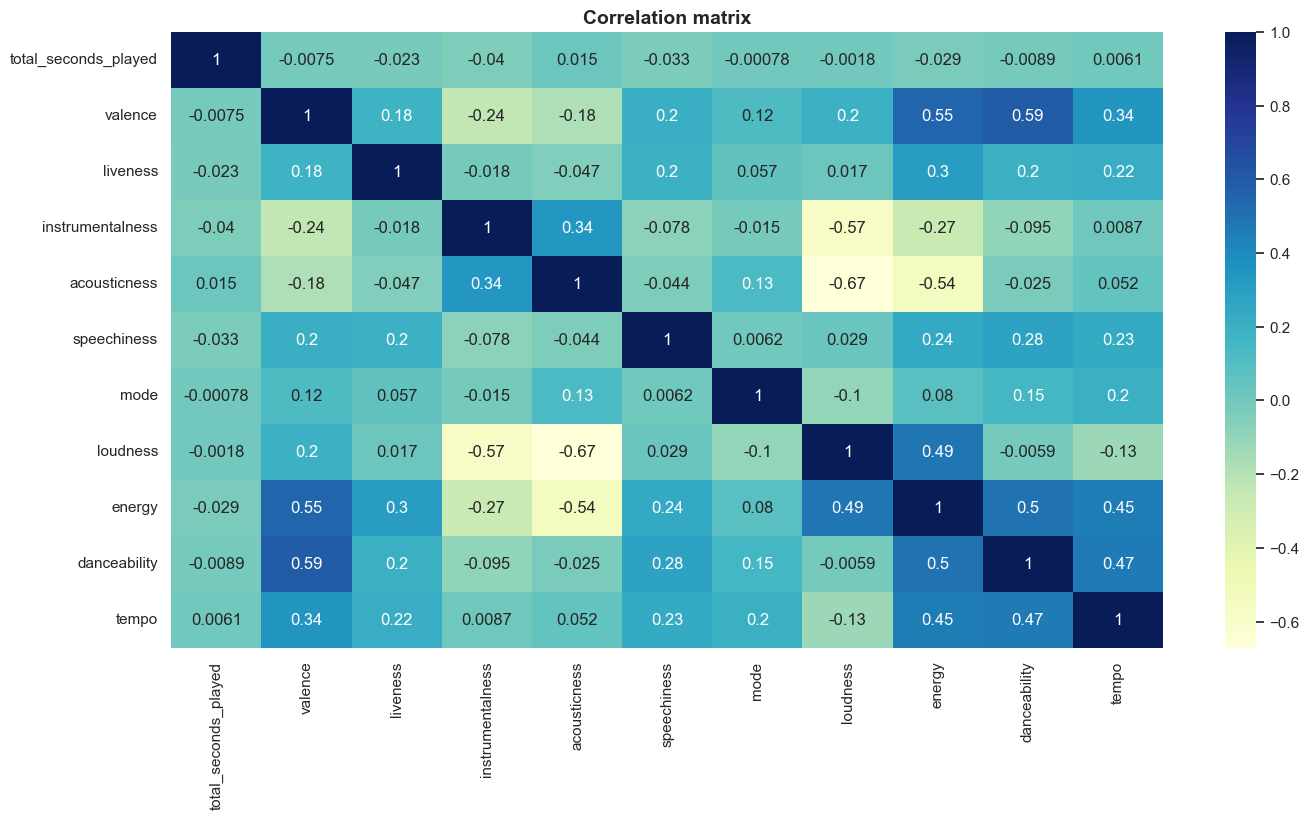

In [23]:
# Using a heatmap display the correlation table accross the songs.

# Set the size of the graph.
plt.figure(figsize=(16, 8))

# Set the style of the graph.
sns.set(style="whitegrid")

# Generate the correlation matrix and save it as a variable.
corr = spotify_attributes.corr()

# Add title
plt.title('Correlation matrix', fontsize=14, fontweight='bold')

# Display the plot.
sns.heatmap(corr,annot=True, cmap="YlGnBu")

* As expected, the Valence value is strongly correlated with danceability and energy, meaning, the closest the valence is to 1 (positive sensations) the most likely the song is danceable and high intensity.

* Energy it's also highly correlated with loudness. Energetic songs usually uses powerfull instruments like heavy percussions, tromphets. Also fast-tempos evoke a sense of adrenaline and/or urgency.

* On the other hand, energy has a reverse correlation with instrumentalness. An energetic song relays more on tempo, loudness and instruments rather than the presence of vocals.

* Tempo is a strong influencer to the danceability. The higher the tempo is, the most likely the song is danceable. 

* Acousticness is negatively correlated with loudness and energy, which is understandable. Many acoustic songs are permormed mainly by instruments that doesn't require electronic amplification to sound, such as guitars, pianos, violins, cellos. Acoustic songs are meant to be for relaxation, concentration or as background sounds, not be highly active.

* Similar effect have instrumentalness with loudness. Orchestral songs of course it can be very loud depending on the thype of instruments occupied, the tempo, scales they are based on or rythym.

* Instrumentalness is also negatively correlated with valence. Having "positive" sensations and "negative" sensations relays in more factors than just being instrumental, for example, string and woodness instruments are more related with sadness, while the use of percussions and tromphets evoke a jubile-high energy atmosphera.

### <a id='toc4_1_2_'></a>[Identify the top 20 genres.](#toc0_)

In [24]:
# Convert 'genre' column to string.
spotify_df['genre'] = spotify_df['genre'].astype(str)

In [25]:
# Display all the genres available.
spotify_df['genre'].value_counts().head(20)

genre
0                          750
alt z                      328
pop                        301
filmi                      206
dance pop                   86
singer-songwriter pop       82
alternative metal           75
anime lo-fi                 68
art pop                     63
drift phonk                 62
brostep                     58
modern alternative rock     56
lo-fi study                 55
edm                         50
anime                       49
chill pop                   47
classical                   46
j-pop                       46
cloud rap                   44
la pop                      42
Name: count, dtype: int64

In [26]:
# 0 is not a genre, it comes from filling the NaN values with a 0. Replace it for 'No genre'.
spotify_df['genre'] = spotify_df['genre'].str.replace('0', 'No genre')
spotify_df['genre'].value_counts().head(20)

genre
No genre                   750
alt z                      328
pop                        301
filmi                      206
dance pop                   86
singer-songwriter pop       82
alternative metal           75
anime lo-fi                 68
art pop                     63
drift phonk                 62
brostep                     58
modern alternative rock     56
lo-fi study                 55
edm                         50
anime                       49
chill pop                   47
classical                   46
j-pop                       46
cloud rap                   44
la pop                      42
Name: count, dtype: int64

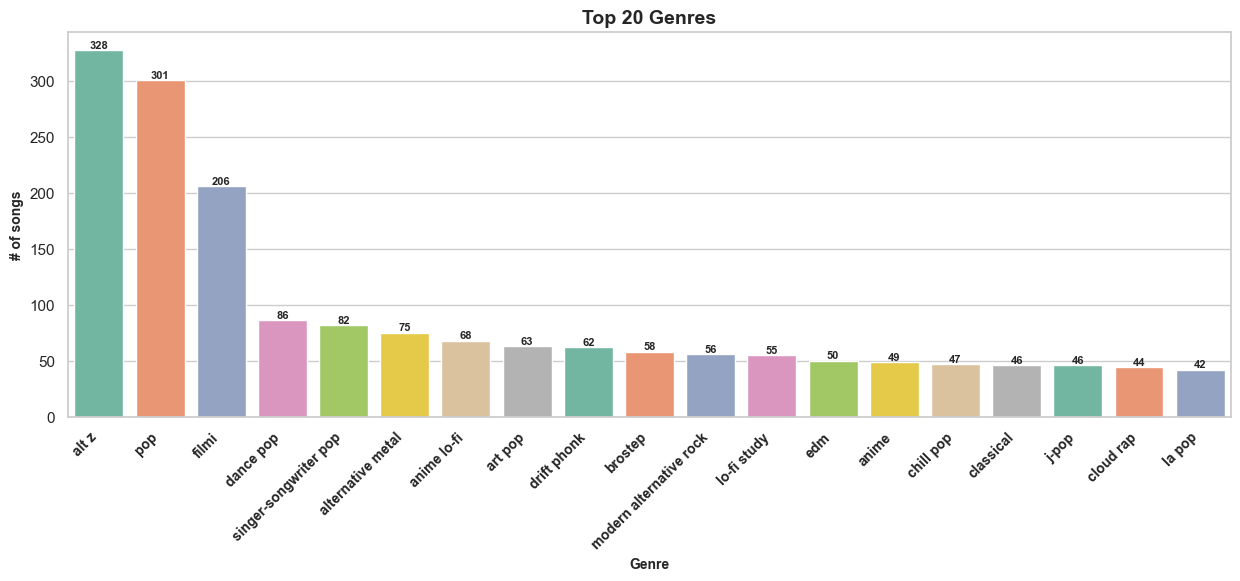

In [27]:
# Visualize genres presence, excluding 'No Genre'.

#Set the size of the graph.
plt.figure(figsize=(15, 5))

# Generate the bar graph. Remember, head(20) return the first 20 entries of the dataframe. Use index method 
# instead
bar_graph = sns.countplot(data=spotify_df, x='genre', order=spotify_df['genre'].value_counts().index[1:20],
                           palette='Set2')

# Set the visual context for the plot.
# "poster" context is used, which is suitable for larger displays.
# font_scale adjusts the size of the fonts used in the plot elements.
# rc (resource configuration) parameter is used to customize specific settings.
sns.set_context("poster", font_scale=0.5, rc={"grid.linewidth": 0.6})

# Add labels and title.
bar_graph.set_title('Top 20 Genres', fontsize=14, fontweight='bold')
bar_graph.set_xlabel('Genre', fontsize=10, fontweight='bold')
bar_graph.set_ylabel('# of songs', fontsize=10, fontweight='bold')
bar_graph.set_xticklabels(bar_graph.get_xticklabels(), fontsize=10, fontweight='bold', rotation=45, ha='right')

# Add annotations to the bars.
for label in bar_graph.containers:
    bar_graph.bar_label(label, fontsize=8, fontweight='bold')

# Display the plot.
plt.show()

* As the bar graph shows, the genres that stands out from the rest are alt z, pop and filmi. The rest of the genres (from the top 20) seems pretty similar between them, meaning, the user's musical taste is diverse. 
* Pop genre seems the more likeable for the user, going throug variations of this genre, such as dance pop, art pop, chili pop, etc. 
* Presence of genres such as 'Brostep', 'Edm', 'Drift Phonk' and of course 'Alt Z' can demosntrate the user has a likeness to electronic instruments.
* Japanesse music seems to be also a big interest with the presence of 'Anime Lo-Fi', 'Anime' and 'J-Pop', or maybe just a likeness to anime, as 'J-Pop' can be referred to Japanesse Pop, a very popular genre among anime.
* Given that 'Filmi' ranks as the third-largest genre, it strongly suggests that the user's musical preferences likely originate from the South Asian region, particularly India or Bangladesh, due to the presence of songs from Bollywood films, which are typically categorized under the 'Filmi' genre.
* It is important to mention that 750 songs are without a genre, so, this insights are only especulative.

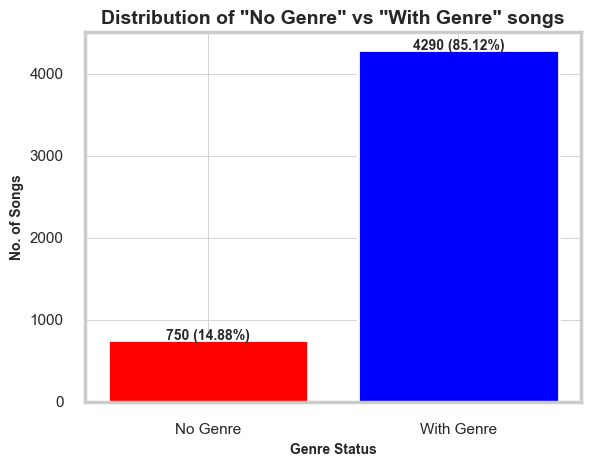

In [28]:
# Calculate the count of 'No Genre' and ''With genre'
no_genre = int((spotify_df['genre'] == 'No genre').sum())
with_genre = int((spotify_df['genre'] != 'No genre').sum())
total_songs = int(no_genre + with_genre)


# Create a bar graph
plt.bar(['No Genre', 'With Genre'], [no_genre, with_genre], color=['red', 'blue'])

# Add labels and title
plt.xlabel('Genre Status', fontsize=10, fontweight='bold')
plt.ylabel('No. of Songs', fontsize=10, fontweight='bold')
plt.title('Distribution of "No Genre" vs "With Genre" songs', fontsize=14, fontweight='bold')

# Add labels above the bars, showing the songs value and %
plt.text('No Genre', no_genre, f'{no_genre} ({((no_genre / total_songs)*100):.2f}%)', ha='center', fontsize=10, fontweight='bold')
plt.text('With Genre', with_genre, f'{with_genre} ({((with_genre / total_songs)*100):.2f}%)', ha='center', fontsize=10, fontweight='bold')

# Display the graph
plt.show()


As mentioned, near 15% of the data has no a specified genre, and looking at how all the genres behave, adding 750 entries will significantly change the Top 20 Genres.

### <a id='toc4_1_3_'></a>[Explore the similarities between the 'Alt z,' 'Pop,' and 'Filmi' genres, considering their notable prominence compared to other genres.](#toc0_)

* **Alt Z** is a genre of music that combines elements of alternative rock, indie rock, and punk rock. It is characterized by its heavy use of distorted guitars, driving rhythms, and often aggressive lyrics. It is often seen as a more modern take on the classic punk sound, with a focus on creating a unique and powerful sound.
* **Pop** music is a genre of popular music that originated in its modern form in the 1950s, deriving from rock and roll. Pop music is generally more commercial, melodic, and accessible than other genres of music and often incorporates electronic and urban elements. Pop music often features a variety of instruments, including drums, guitars, keyboards, and synthesizers.
* **Filmi music** is a genre of Indian music that is used in the soundtracks of Bollywood films. It is a blend of traditional Indian music, such as classical, folk, and devotional, with Western influences, such as jazz, rock, and pop. It is characterized by its catchy melodies, energetic rhythms, and use of synthesizers and electronic instruments. It is often used to create a sense of drama and emotion in films.

[Alt Z definition](https://volt.fm/genre/1837/alt-z)

[Pop definition](https://volt.fm/genre/1140/pop)

[Filmi definition](https://volt.fm/genre/1544/filmi)

In [29]:
# Filter the dataframe to include only the 'Alt z,' 'Pop,' and 'Filmi' genres.
top_3_genres = spotify_df[(spotify_df['genre'] == 'alt z') | (spotify_df['genre'] == 'pop') | 
                          (spotify_df['genre'] == 'filmi')]
top_3_genres

,trackName,artistName,timePlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,durationTime,total_seconds_played
5,(L)only Child,salem ilese,37m : 17s,alt z,0.645,0.611,-5.925,0.0,0.1370,0.290000,0.000021,0.2370,0.645,157.475,2m : 24s,2237
17,13 Missed Calls,Zach Hood,54m : 8s,alt z,0.639,0.724,-6.346,1.0,0.0664,0.452000,0.000000,0.1590,0.522,129.712,3m : 29s,3248
20,18,Jeremy Zucker,2m : 30s,alt z,0.783,0.599,-5.688,1.0,0.0441,0.044500,0.000000,0.1080,0.611,113.970,2m : 30s,150
29,2021,Lauv,3m : 15s,pop,0.849,0.489,-7.433,1.0,0.0509,0.683000,0.000019,0.1080,0.345,113.977,3m : 15s,195
35,22,Taylor Swift,9m : 55s,pop,0.642,0.695,-5.620,1.0,0.0281,0.000443,0.000010,0.0753,0.642,103.984,3m : 50s,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,You Deserve Better,James Arthur,2m : 17s,pop,0.516,0.560,-7.116,0.0,0.4860,0.032200,0.000000,0.1500,0.696,98.940,3m : 27s,137
5028,Young & Alive,Bazzi,0m : 38s,pop,0.716,0.563,-5.486,1.0,0.0426,0.326000,0.000000,0.1190,0.494,86.005,2m : 40s,38
5030,Young Dumb & Broke,Khalid,8m : 4s,pop,0.799,0.539,-6.351,1.0,0.0421,0.199000,0.000017,0.1650,0.394,136.948,3m : 22s,484
5033,Younger,Jonas Blue,42m : 40s,pop,0.784,0.845,-2.793,1.0,0.0596,0.286000,0.000016,0.0740,0.888,105.981,3m : 14s,2560


In [30]:
# Compare the mean values from 'total_seconds_played', 'energy', 'danceability', 'loudness' and valence'
# between each genre.

# Define a function to create a line plot showing mean values for different genres.
def create_line_mean_plot(data, column_name, y_label, line_color):

    # Group the data by 'genre' and calculate the mean of the specified column.
    grouped_data = data.groupby('genre')[column_name].mean()

    # Create a line plot using Seaborn.
    # 'x' is the genres, 'y' is the mean values of the specified column.
    line_plot = sns.lineplot(x=grouped_data.index, y=grouped_data, marker='o', color=line_color)

    # Add labels and title.
    line_plot.set_ylabel(f'Mean {y_label} for genre', fontsize=10, fontweight='bold')
    line_plot.set_xlabel('Genre', fontsize=10, fontweight='bold')
    line_plot.set_title(f'Mean {y_label} Graph', fontsize=14, fontweight='bold')

    # Add annotations to the data points.
    for x, y in zip(grouped_data.index, grouped_data):
        line_plot.annotate(f'{y:.3f}', (x, y), textcoords='offset points', xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

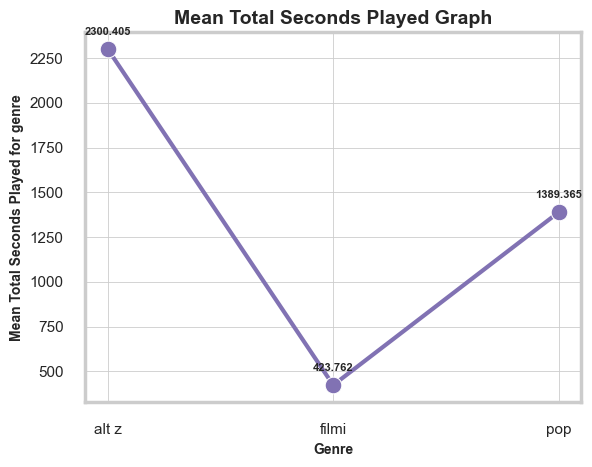

In [31]:
# Call the function to create the mean total seconds playedcline graph.
create_line_mean_plot(top_3_genres, 'total_seconds_played', 'Total Seconds Played', 'm')

Alt Z is by far the most streamed genre. On average it's almost twice as the 2nd genre, 'Pop'. Filmi on the other hand is significantly the less streamed genre among the top 3.

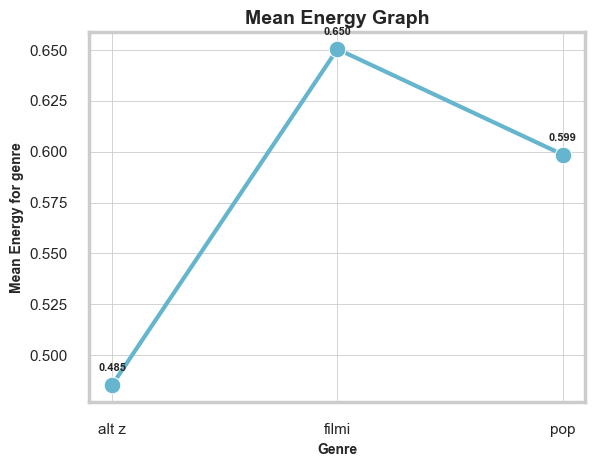

In [32]:
# Call the function to create the mean energy line graph.
create_line_mean_plot(top_3_genres, 'energy', 'Energy', 'c')

One of the reasons that this 3 genres are the most streamed from the user relays on the energy they have. Pop and Filmi are really close from each other with a difference of only 0.025. it is above 0.5 which means they're are enough to be considered as energetic genres.

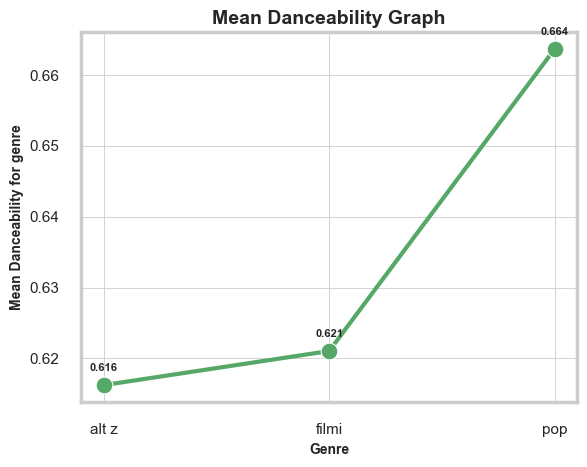

In [33]:
# Call the function to create the mean danceability line graph.
create_line_mean_plot(top_3_genres, 'danceability', 'Danceability', 'g')

All the genres are almost on the same level of danceability, which can lead to a conclussion that the user listen these 3 genres the most because of his likeness to dance. Taking information from last task, 'Dance pop' arises as the 4th most streamed genre, added to the presence of various pop sub-genres it can be determined that the user likes dancing a lot.

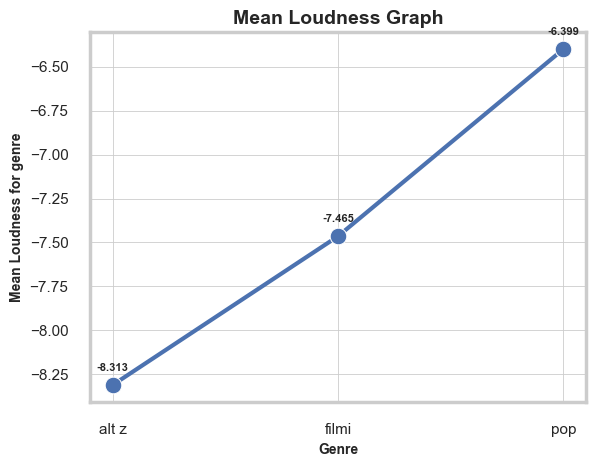

In [34]:
# Call the function to create the mean loudness line graph.
create_line_mean_plot(top_3_genres, 'loudness', 'Loudness', 'b')

According to Spotify API Documentation, a song with a value higher than -10db is considered as a loud song. Lowere then -30db is considered as a quiet song. Pop genre stands as the louder genre, followed by filmi and final alt z, quite surprising, as Alt Z uses a lot of amplified instruments. On the other hand, as pop genre has more danceability might be the reason why is louder. Although the values in general has not a big difference.

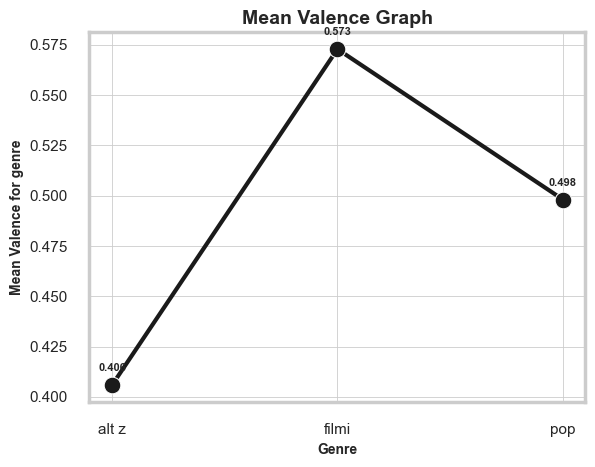

In [35]:
# Call the function to create the mean valence line graph.
create_line_mean_plot(top_3_genres, 'valence', 'Valence', 'k')

According to the line graph, the mean valence of the 3 genres are between 0.4 - 0.6. Spotify's information says the closer the value to 0, the negativeness the song is, nevertheless, there's no a clear spectrum about it. Doing a further research, an interesting study about the emotions and the music comes to the project. For a better understanding about the emotions a song might cause is neccesary to bring the energy levels into the equation, not only the valence. Quoting: *Energy corresponds to the human activation or arousal and valence to the human mood (Krause & North, 2014; Russell, 1980). Popular streaming services such as Spotify use these two music parameters to classify music (Jamdar et al., 2015). Energy in music is a perceptible measure of intensity and activity. Typically, energetic tracks feel fast, loud and intense. For example, Death Metal very often has high energy, while a ballad has low values on the scale. Valence, on the other hand, describes the musical positivity conveyed by a piece of music. Songs with high valence sound more positive (e.g. happy, cheerful, euphoric), while pieces withlow valence sound more negative (e.g. sad, depressed, angry) (Kim, Lee, Kim, & Yoo, 2011).*

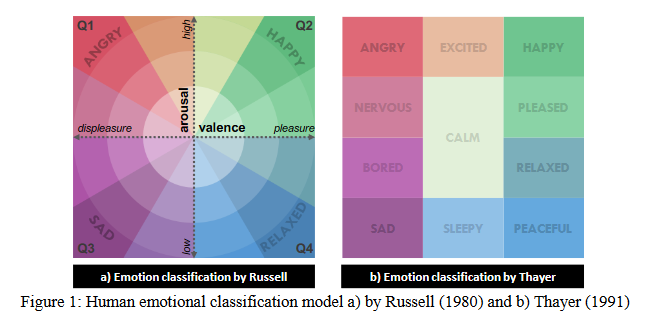

It is needed to found a propper plot to lacalize both energy and valence and decide what type of emotion the genre may have (it is important to remember that this is an aproximation for the genre, analyzing song by song might lead to different results).

[Emotional music classification](https://www.researchgate.net/publication/334084112_Feel_the_Moosic_Emotion-based_Music_Selection_and_Recommendation)

In [36]:
# Load Russell's and Thayer's emotional classification images to use them in the plot.
thayer_image = mpimg.imread(r'C:\Users\raul_\OneDrive\Documentos\PythonFolder\DataAnalysiswithJupyter\SpotifyProject\valence_vs_energy_thayer.PNG')
russell_image = mpimg.imread(r'C:\Users\raul_\OneDrive\Documentos\PythonFolder\DataAnalysiswithJupyter\SpotifyProject\valence_vs_energy.PNG')  

In [37]:
# As the images suggest to locate a point with given coordenate values, a scatter
# plot will be the best approach for it.

# Create a function to generate a scatter plot
def create_emotional_classification(data, text_column, image, image_name):

    # Iterate through the index of the 'top_10_songs' DataFrame
    for idx, value in enumerate(data.index):

        # Create a color palette using Seaborn's color_palette function
        palette = sns.color_palette("Set1", n_colors=len(data))

        #Create a scatter plot point for each song with specified attributes.
        # 'valence' is the x-coordinate, 'energy' is the y-coordinate.
        # 'c' sets the color to black, 's' sets the marker size to 20.
        plt.scatter(x=data.loc[value,'valence'], y=data.loc[value,'energy'] , c=palette[idx], s=20)

        # Extract the name of the current song from the DataFrame
        genre_name=data.loc[value, text_column]

        # Add an annotation (text label) at the specified position
        # 'xy' specifies the position of the annotation
        plt.annotate(genre_name, xy=(data.loc[value,'valence'],data.loc[value,'energy']), fontsize=8, fontweight='bold')


    # Set x and y axis limits to 0 and 1.
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Set x and y tick locations and labels.
    plt.xticks([0, 0.5, 1], ['0', '0.5', '1'])
    plt.yticks([0, 0.5, 1], ['0', '0.5', '1'])

    # Load the background image and add it using imshow.
    plt.imshow(image, extent=(0, 1, 0, 1), aspect='auto', alpha=0.7)

    # Add labels and title.
    plt.xlabel('Valence', fontsize=10, fontweight='bold')
    plt.ylabel('Energy', fontsize=10, fontweight='bold')
    plt.title(f'Emotional classification by {image_name}', fontsize=14, fontweight='bold')

    # Display the plot.
    plt.show()

In [38]:
# Group the 'top_3_genres' DataFrame by 'genre' and calculate the mean valence and energy for each genre.
valence = top_3_genres.groupby('genre')['valence'].mean().reset_index()
energy = top_3_genres.groupby('genre')['energy'].mean().reset_index()

# Merge the 'valence' and 'energy' DataFrames based on the 'genre' column.
# This creates a new dataframe 'valence_and_energy' with mean valence and energy values for each genre.
valence_and_energy = pd.merge(valence, energy, on='genre')
valence_and_energy

,genre,valence,energy
0,alt z,0.405865,0.485254
1,filmi,0.572869,0.650437
2,pop,0.498105,0.598531


C:\Users\raul_\AppData\Local\Temp\ipykernel_11696\1071938291.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=data.loc[value,'valence'], y=data.loc[value,'energy'] , c=palette[idx], s=20)


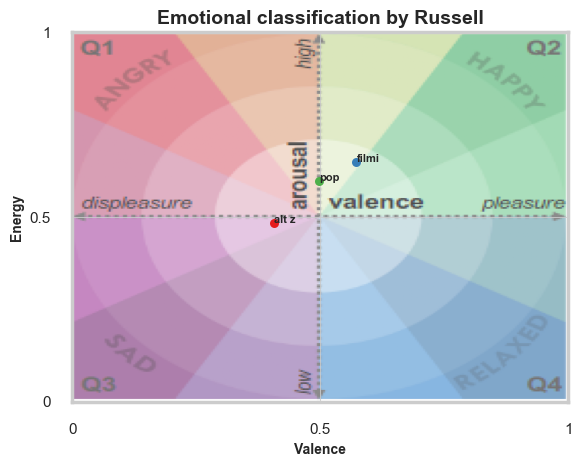

In [39]:
# Create emotional classification plot of genres using Russell's image.
create_emotional_classification(valence_and_energy, 'genre', russell_image, 'Russell')

With the Russel's classification it is easier to give a better analysis of the genre's emotions. Filmi appears as the happier genre, while Alt Z appears as the saddest one. Pop appears to be an equilibrated genre with a slightly high energy. None of them appears to be genres to listen if relaxing is the pourpose.

C:\Users\raul_\AppData\Local\Temp\ipykernel_11696\1071938291.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=data.loc[value,'valence'], y=data.loc[value,'energy'] , c=palette[idx], s=20)


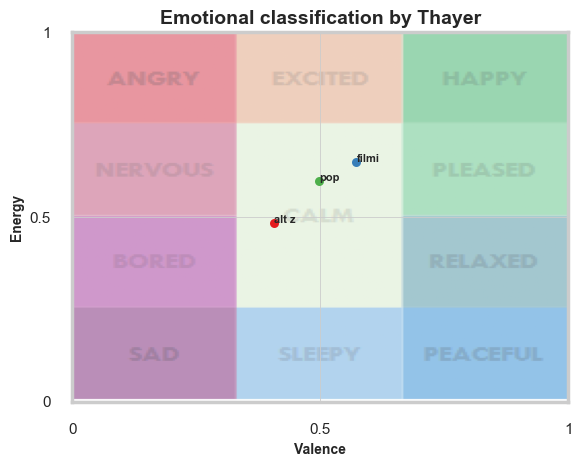

In [40]:
# Create emotional classification plot of genres using Thayer's image.
create_emotional_classification(valence_and_energy, 'genre', thayer_image, 'Thayer')

Thayer's classification provides more options to classify the songs. While in Rusell's image only 4 emotions could be identified, here there are 11, and interpretation of the results became different, as all the genres are on the 'Calm' area, meaning, they don't necessarilly evoke an specific emotion to the listener.

## <a id='toc4_2_'></a>[User's musical preferences analysis.](#toc0_)

### <a id='toc4_2_1_'></a>[Show the Top 500 streamed songs, grouped by genres. Display only the titles from the Top 10 songs and streamed time.](#toc0_)

In [41]:
# Order the dataframe using 'total_seconds_played' column.
spotify_df.sort_values(by='total_seconds_played', ascending=False)

,trackName,artistName,timePlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,durationTime,total_seconds_played
4194,Sparkle - movie ver.,RADWIMPS,43h : 59m : 27s,j-pop,0.372,0.426,-8.421,1.0,0.0339,0.68700,0.007840,0.1090,0.287,123.993,8m : 57s,158367
1001,色香水,Yoh kamiyama,30h : 27m : 32s,japanese teen pop,0.613,0.857,-5.272,1.0,0.0271,0.06860,0.000079,0.2560,0.698,147.974,4m : 10s,109652
2058,Gone,Blake Rose,29h : 23m : 18s,australian electropop,0.317,0.545,-6.439,0.0,0.0468,0.03900,0.000000,0.1160,0.140,139.014,3m : 25s,105798
2890,Lonely City,Mokita,28h : 28m : 23s,chill pop,0.735,0.370,-12.581,0.0,0.0705,0.38900,0.001630,0.1060,0.305,112.015,2m : 37s,102503
4559,This Town (feat. Sasha Alex Sloan),Kygo,21h : 12m : 40s,edm,0.736,0.449,-7.956,0.0,0.0633,0.50600,0.000066,0.1170,0.487,147.971,3m : 22s,76360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Mercy,Shawn Mendes,0m : 0s,canadian pop,0.555,0.662,-4.952,0.0,0.0827,0.12500,0.000000,0.1110,0.356,148.128,3m : 28s,0
2607,"June, After Dark",Elliot Root,0m : 0s,hopebeat,0.590,0.697,-6.973,1.0,0.0356,0.11500,0.003080,0.1210,0.323,106.060,3m : 39s,0
1360,Concrete Jungle,Black Label Society,0m : 0s,alternative metal,0.451,0.987,-4.105,1.0,0.1060,0.00001,0.102000,0.0568,0.368,137.731,3m : 24s,0
3110,Mere Yaaraa,Arijit Singh,0m : 0s,filmi,0.324,0.539,-8.076,1.0,0.0380,0.71300,0.000031,0.1180,0.486,120.526,4m : 45s,0


In [42]:
# Generate a new dataframe to store the sorted Top 500 songs.
top_500_songs = spotify_df.sort_values(by='total_seconds_played', ascending=False).head(500)
top_500_songs.shape

(500, 16)

In [43]:
# Reset the index
top_500_songs.reset_index(inplace=True, drop=True)

In [44]:
# Show the top 10
top_500_songs[['trackName', 'artistName','timePlayed']].head(10)

,trackName,artistName,timePlayed
0,Sparkle - movie ver.,RADWIMPS,43h : 59m : 27s
1,色香水,Yoh kamiyama,30h : 27m : 32s
2,Gone,Blake Rose,29h : 23m : 18s
3,Lonely City,Mokita,28h : 28m : 23s
4,This Town (feat. Sasha Alex Sloan),Kygo,21h : 12m : 40s
5,Wannabe - Sped Up Version,why mona,20h : 31m : 18s
6,Until I Found You,Stephen Sanchez,17h : 49m : 20s
7,Eye-Water,Hiroyuki Sawano,16h : 12m : 20s
8,Without Me,Eminem,15h : 49m : 35s
9,BYE,Jaden,15h : 11m : 28s


### <a id='toc4_2_2_'></a>[Clasify Top 10 songs using Russell's and Thayer's Emotional Classification.](#toc0_)

In [47]:
# Generate a dataframe with the Top 10 songs.
top_10_songs = spotify_df.sort_values(by='total_seconds_played', ascending=False).head(10)
top_10_songs

,trackName,artistName,timePlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,durationTime,total_seconds_played
4194,Sparkle - movie ver.,RADWIMPS,43h : 59m : 27s,j-pop,0.372,0.426,-8.421,1.0,0.0339,0.68700,0.007840,0.1090,0.2870,123.993,8m : 57s,158367
1001,色香水,Yoh kamiyama,30h : 27m : 32s,japanese teen pop,0.613,0.857,-5.272,1.0,0.0271,0.06860,0.000079,0.2560,0.6980,147.974,4m : 10s,109652
2058,Gone,Blake Rose,29h : 23m : 18s,australian electropop,0.317,0.545,-6.439,0.0,0.0468,0.03900,0.000000,0.1160,0.1400,139.014,3m : 25s,105798
2890,Lonely City,Mokita,28h : 28m : 23s,chill pop,0.735,0.370,-12.581,0.0,0.0705,0.38900,0.001630,0.1060,0.3050,112.015,2m : 37s,102503
4559,This Town (feat. Sasha Alex Sloan),Kygo,21h : 12m : 40s,edm,0.736,0.449,-7.956,0.0,0.0633,0.50600,0.000066,0.1170,0.4870,147.971,3m : 22s,76360
4802,Wannabe - Sped Up Version,why mona,20h : 31m : 18s,la pop,0.669,0.782,-6.827,0.0,0.1050,0.31700,0.000355,0.4660,0.3420,92.528,3m : 11s,73878
4709,Until I Found You,Stephen Sanchez,17h : 49m : 20s,gen z singer-songwriter,0.551,0.550,-5.339,1.0,0.0286,0.77700,0.000000,0.2020,0.3420,101.190,2m : 56s,64160
1771,Eye-Water,Hiroyuki Sawano,16h : 12m : 20s,anime score,0.585,0.335,-13.812,0.0,0.0313,0.66300,0.888000,0.0987,0.0375,119.947,3m : 1s,58340
4946,Without Me,Eminem,15h : 49m : 35s,detroit hip hop,0.908,0.669,-2.827,1.0,0.0738,0.00286,0.000000,0.2370,0.6620,112.238,4m : 50s,56975
359,BYE,Jaden,15h : 11m : 28s,pop rap,0.635,0.510,-6.348,1.0,0.0344,0.30800,0.012700,0.1620,0.3340,119.986,4m : 56s,54688


In [48]:
# Reset de index labels.
top_10_songs.reset_index(inplace=True, drop=True)

C:\Users\raul_\AppData\Local\Temp\ipykernel_11696\1071938291.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=data.loc[value,'valence'], y=data.loc[value,'energy'] , c=palette[idx], s=20)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPyt

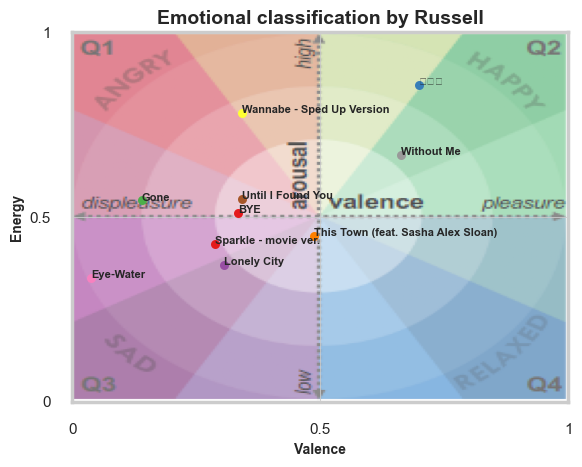

In [49]:
# Create emotional classification plot of tracks using Russell's image.
create_emotional_classification(top_10_songs, 'trackName', russell_image, 'Russell')

Using the russell clasification the following insights were obtained: 

* Surprisingly, the most streamed song is classified as Sad.

* Only 2 songs appears on the pleasure side of the valence, while the rest are classified into displeasure category, meaning they have a negative vibe, or at least not to positive feelings.

* Top 2 song stand as the one with the highest energy, and with the most positive result, staying in the 'Happy' zone.

* 'This Town (feat Sasha Alex Sloan) is the most calm / equilibrated song from the top 10.

C:\Users\raul_\AppData\Local\Temp\ipykernel_11696\1071938291.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=data.loc[value,'valence'], y=data.loc[value,'energy'] , c=palette[idx], s=20)


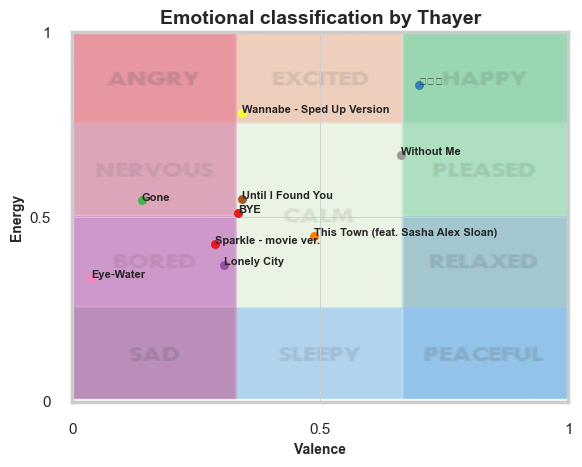

In [50]:
# Create emotional classification plot of tracks using Thayer's image.
create_emotional_classification(top_10_songs, 'trackName', thayer_image, 'Thayer')

Using Thayer classification the following insights were obtained:

* 'Sparkle', 'Eye - Water' and 'Lonely City' (#1, #7 and #3 respectively) are clasified as boring songs. Quite interesting. Normally, a bored song will not be one of the top 10 streamed songs from a person at first sight.

* 'Without me' and '色香水' are the most positive songs from the Top 10, appearing in Pleased and Happy zone respectively.

* 'Wannabe - Sped Up' version is classified as excited, with really high energy, being the 2nd highest in this category.

* Essentially, accross the Top 10 songs, there is prominence on the prescense of negative songs. 

### <a id='toc4_2_3_'></a>[Find a pattern to justify why those songs are the Top 10.](#toc0_)

In [51]:
top_10_songs

,trackName,artistName,timePlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,durationTime,total_seconds_played
0,Sparkle - movie ver.,RADWIMPS,43h : 59m : 27s,j-pop,0.372,0.426,-8.421,1.0,0.0339,0.68700,0.007840,0.1090,0.2870,123.993,8m : 57s,158367
1,色香水,Yoh kamiyama,30h : 27m : 32s,japanese teen pop,0.613,0.857,-5.272,1.0,0.0271,0.06860,0.000079,0.2560,0.6980,147.974,4m : 10s,109652
2,Gone,Blake Rose,29h : 23m : 18s,australian electropop,0.317,0.545,-6.439,0.0,0.0468,0.03900,0.000000,0.1160,0.1400,139.014,3m : 25s,105798
3,Lonely City,Mokita,28h : 28m : 23s,chill pop,0.735,0.370,-12.581,0.0,0.0705,0.38900,0.001630,0.1060,0.3050,112.015,2m : 37s,102503
4,This Town (feat. Sasha Alex Sloan),Kygo,21h : 12m : 40s,edm,0.736,0.449,-7.956,0.0,0.0633,0.50600,0.000066,0.1170,0.4870,147.971,3m : 22s,76360
5,Wannabe - Sped Up Version,why mona,20h : 31m : 18s,la pop,0.669,0.782,-6.827,0.0,0.1050,0.31700,0.000355,0.4660,0.3420,92.528,3m : 11s,73878
6,Until I Found You,Stephen Sanchez,17h : 49m : 20s,gen z singer-songwriter,0.551,0.550,-5.339,1.0,0.0286,0.77700,0.000000,0.2020,0.3420,101.190,2m : 56s,64160
7,Eye-Water,Hiroyuki Sawano,16h : 12m : 20s,anime score,0.585,0.335,-13.812,0.0,0.0313,0.66300,0.888000,0.0987,0.0375,119.947,3m : 1s,58340
8,Without Me,Eminem,15h : 49m : 35s,detroit hip hop,0.908,0.669,-2.827,1.0,0.0738,0.00286,0.000000,0.2370,0.6620,112.238,4m : 50s,56975
9,BYE,Jaden,15h : 11m : 28s,pop rap,0.635,0.510,-6.348,1.0,0.0344,0.30800,0.012700,0.1620,0.3340,119.986,4m : 56s,54688


In [52]:
# Create a line graph to compare each song's attributes vs the mean value of the main dataframe.

# Define a function to create the line plot.
def create_line_plot(data, mean_data, column_name, y_label):

    # Calculate the mean value of the specified column.
    mean_value = mean_data[column_name].mean()

    # Set the line graph size.
    plt.figure(figsize=(20, 5))

    # Create a line plot using Seaborn
    # 'x' is the 'trackName', 'y' is the specified column
    # Markers are added to the data points
    sns.lineplot(data=data, x='trackName', y=column_name, markers='o')

    # Add a horizontal dashed line representing the mean value
    plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean {column_name.capitalize()}= {mean_value:.2f}')

    # Rotate x-axis labels by 45 degrees and set their font size
    plt.xticks(rotation=45, fontsize=10)

    # Add labels.
    plt.xlabel('Song', fontsize=10, fontweight='bold')
    plt.ylabel(y_label, fontsize=10, fontweight='bold')
    plt.title(f'{y_label} accross the Top 10 songs', fontsize=14, fontweight='bold')

    # Add text annotations to the data points
    for index, row in data.iterrows():
        plt.text(index, row[column_name], f'{row[column_name]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Add a legend to the plot
    plt.legend()

    # Display the plot
    plt.show()



C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


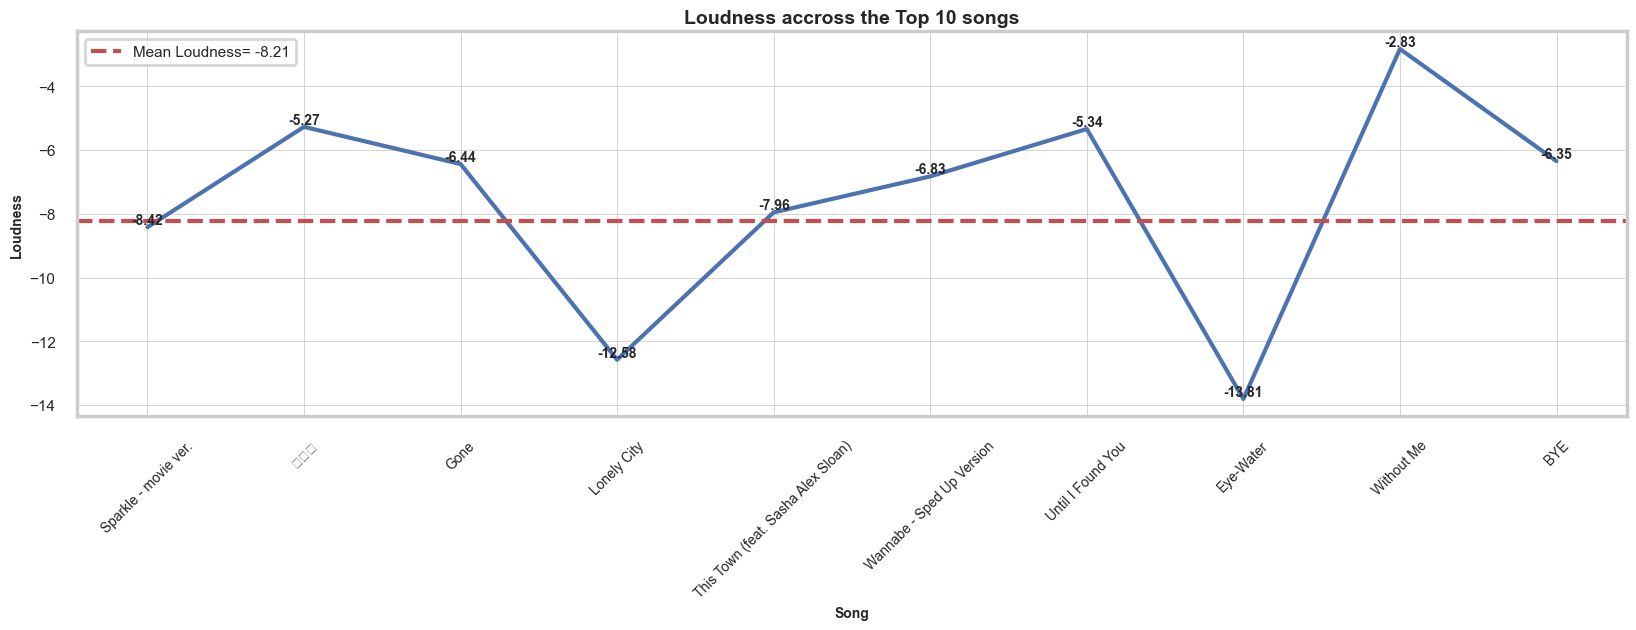

In [53]:
# Call the function to create the loudness plot.
create_line_plot(top_10_songs, spotify_df, 'loudness', 'Loudness')

Withing 'Loudness' there is not a clear pattern to sustaing a reason why this songs appears on the Top 10.

C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


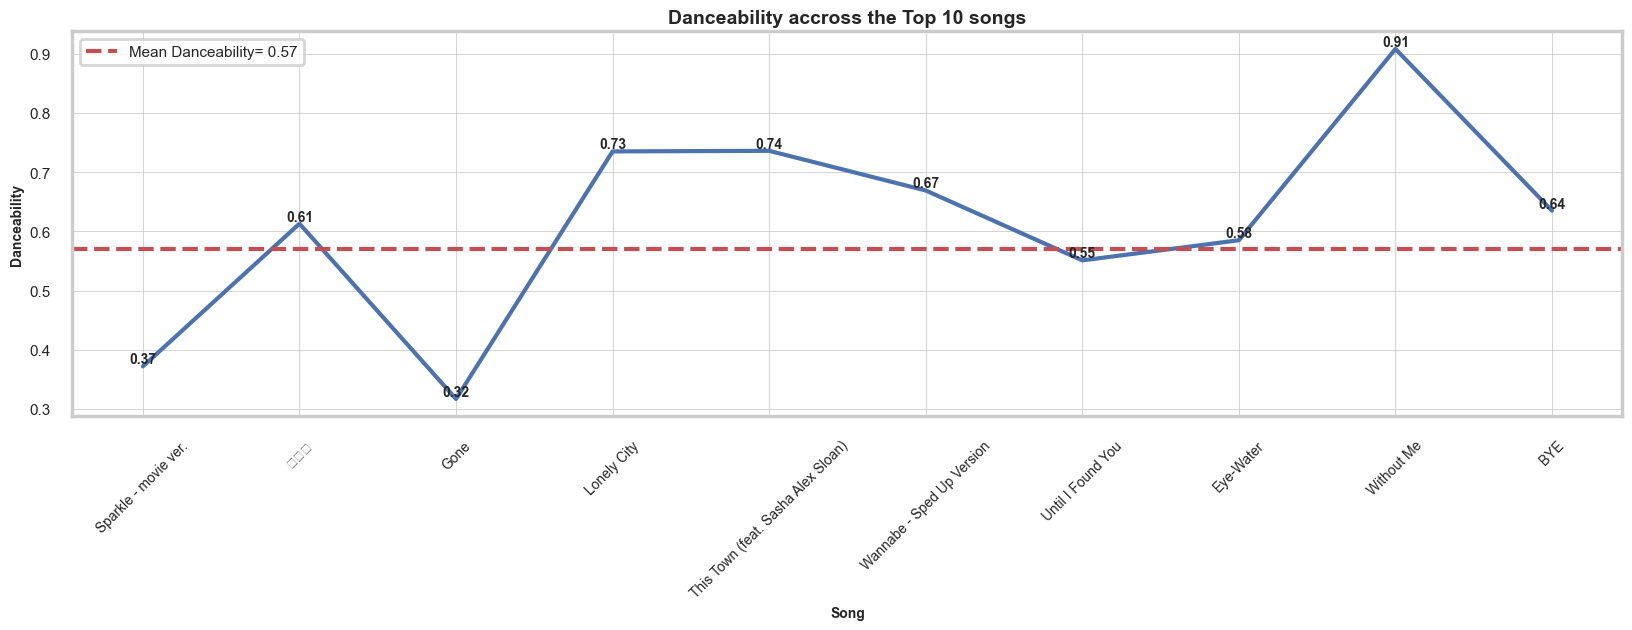

In [54]:
# Call the function to create the danceability plot.
create_line_plot(top_10_songs, spotify_df, 'danceability', 'Danceability')

As on the previous section, where user's interest on danceables songs was discovered, making a comparission between 'danceability' it is more clear that statement, as 3 songs are near the average and 5 songs above it.

C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


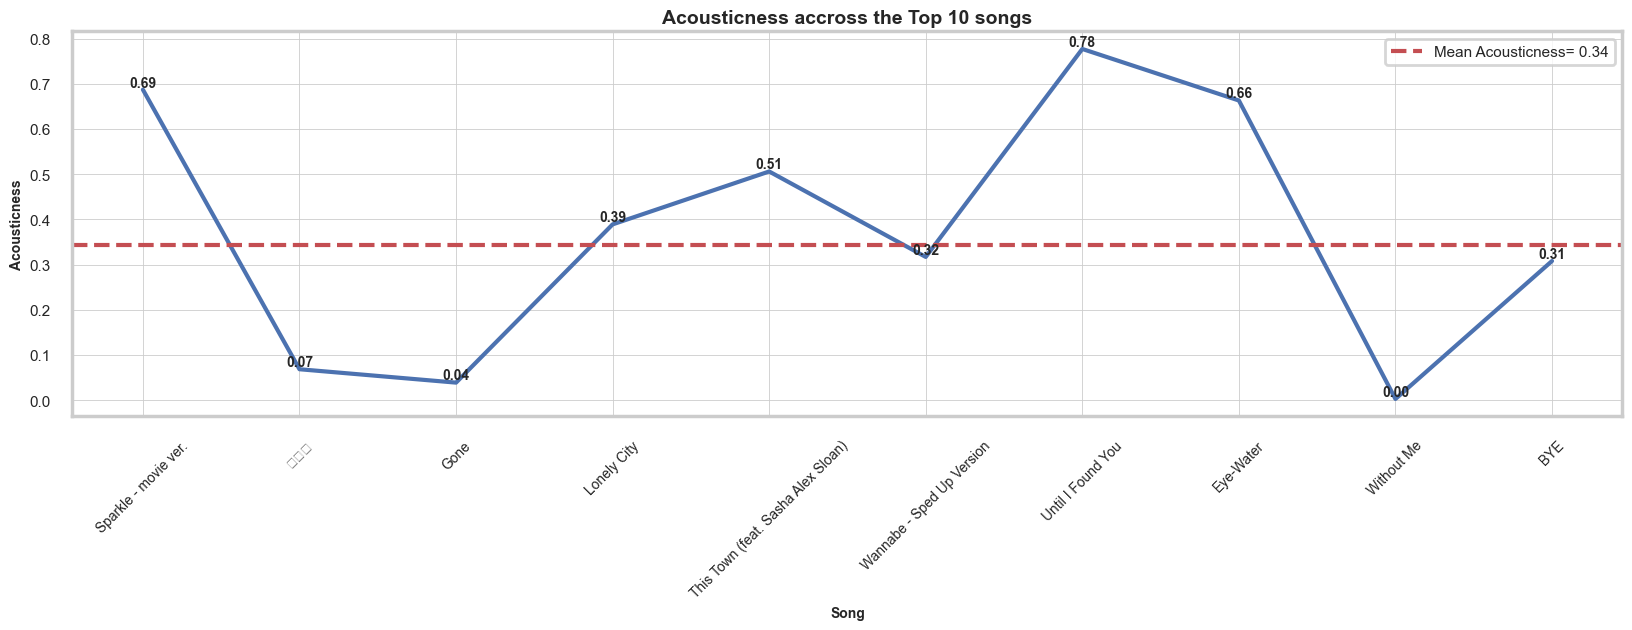

In [55]:
# Call the function to create the danceability plot.
create_line_plot(top_10_songs, spotify_df, 'acousticness', 'Acousticness')

Acousticness is an interesting attribute. Similar to danceability, almost all the Top 10 songs are near the average or above it.

C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raul_\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


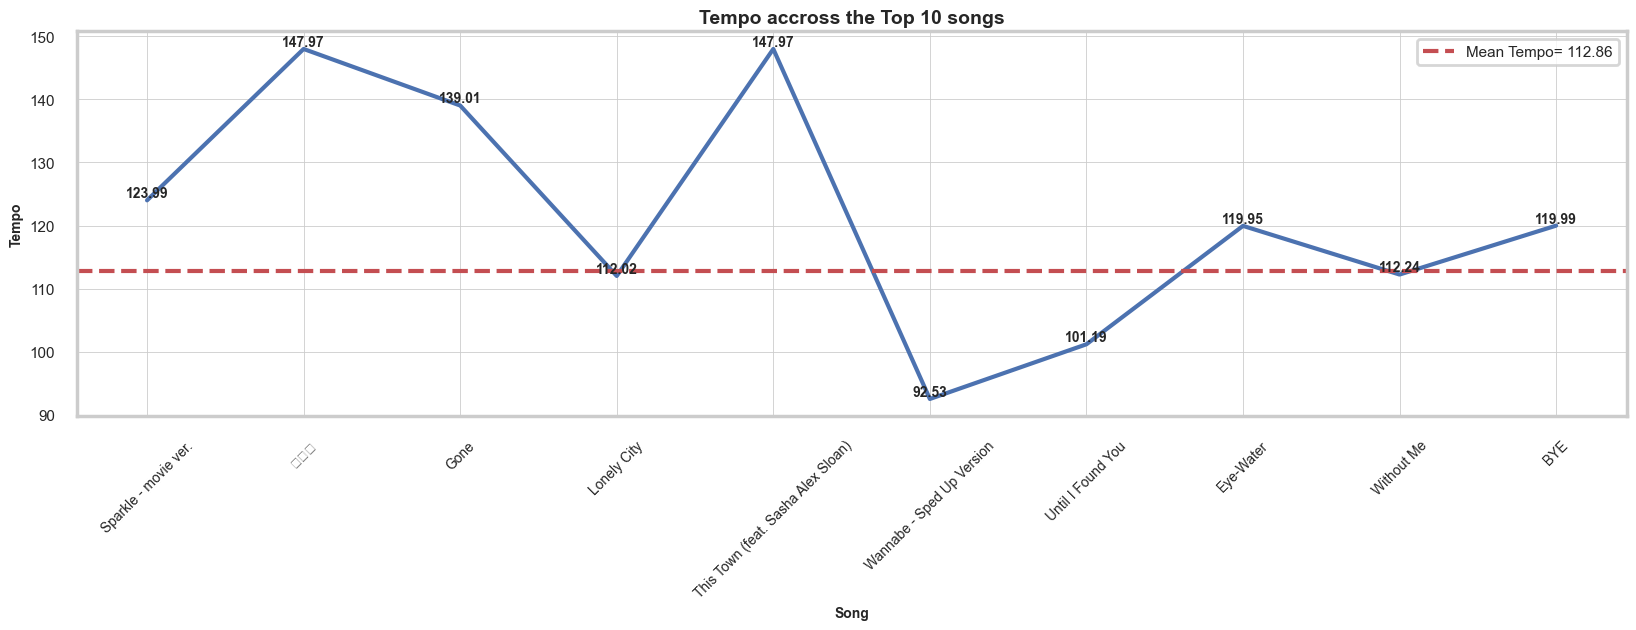

In [56]:
# Call the function to create the Tempo plot.
create_line_plot(top_10_songs, spotify_df, 'tempo', 'Tempo')

With tempo the differences are higher, as the peaks are really high/low dependending on which side of the average line they appear. Althoug is interesting how the song 'Gone' has such a high tempo and clssified as 'Nervous' songs. 

# <a id='toc5_'></a>[General conclussions.](#toc0_)

In the era of streaming music services, the significance of possessing user preference data transforms platforms like Spotify into personalized havens of entertainment, continually refining their offerings as technology advances. Through this project, we've harnessed a wealth of user preferences, enabling us to enhance song recommendations, introduce emerging artists, and more.

Combined with marketing it is possible to suggest this user new titles of anime for example. Even it is possible to suggest a list of new / trending Bollywood movies. On the same pattern, with the user's prominence to dance, it is possible to suggest dancing events, classes. Even going further, a mixture can lead to suggestions of bollywood dancing movies, anime dancing titles, etc. It is already demonstrated that data has become an amazing ally to marketing.

Beyond entertainment, music's therapeutic potential is compelling. Numerous studies highlight its efficacy in addressing cognitive challenges like depression, anxiety, and attention disorders. Moreover, our listening habits can offer insights into our emotional states—revealing periods of melancholy or anxiety. On a more serious note, even indications of suicidal tendencies can potentially be gleaned from music preferences.

These applications only skim the surface of the vast potential of this information. As computational algorithms, AI, and Machine Learning continue to evolve, the data sourced from a seemingly 'simple' Spotify account can pave the way for even grander innovations. The journey of data-driven discovery has just begun, promising an exciting realm of transformative applications.